# 线性回归拟合正弦函数

本节用线性回归模拟正弦函数,熟悉多项式回归

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

生成200个在$[-2\pi,2\pi]$区间内正弦函数上的点,并加入一些随机的噪声

In [5]:
n_dots = 200
# 拟合的点数
X = np.linspace(-2*np.pi,2*np.pi,n_dots)
# linspace创建等差数列,给定起始值终止值以及个数
# 这里创建从-2pi到2pi的包含200个数的等差数列
Y = np.sin(X) + 0.2 * np.random.rand(n_dots) - 0.1
# 计算所有X的正弦值, 使用random.rand生成200个服从标准正态分布的随机数
# 随机数乘以0.2减0.1生成随机误差项
X = X.reshape(-1,1)
# 重定义维度,将一维数组X变成2为数组,多行一列,-1表示自动计算行数,1表示1列
Y = Y.reshape(-1,1)

其中reshape将数据转成多行一列,以符合scikit-learn的输入格式要求

创建一个多项式拟合模型:

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

def polynomial_model(degree=1,normalize=True):
    polynomial_features = PolynomialFeatures(degree = degree,
                                            include_bias = False)
    linear_regression = LinearRegression(normalize = normalize)
    pipeline = Pipeline([("polynomial_features",polynomial_features),
                        ("linear_regression",linear_regression)])
    return pipeline

- PolynomialFeatures:创建多项式项和交互项
    - degree: 多项式项数,默认为2
    - interaction_only: 是否仅包含交互项不包含高次项,默认False
    - include_bias: 是否包含截距项,默认True
- LinearRegression:最小二乘线性回归
    - fit_intercept: 布尔值,是否计算截距项,默认为真
    - normalize: 布尔,是否对预测变量正则化,默认为假
    - copy_X: 布尔,X是否被复制,默认为真
    - n_jobs: 使用的核数,默认为1,-1表示使用所有CPUs
- Pipeline: 变换的管道和最终的估计,一个Pipeline可以包含多个处理结点,最后一个结点只需要实现fit()方法,其他结点必须实现fit()和transform()方法,从前往后依次调用.可以通过修改每个结点的参数,使用.set_params(),设置参数书写格式为: 结点名__参数名=给定值

分别用2,3,5,10阶多项式来拟合数据集:

In [7]:
from sklearn.metrics import mean_squared_error
# 加载计算均方误差的函数
degrees = [2,3,5,10]
# 定义多项式回归的阶数
results = []
# 创建空列表存储模型,阶数和得分
for d in degrees:
# 对每个阶数循环
    model = polynomial_model(degree = d)
    # 使用之前自定义的函数创建多项式回归
    model.fit(X,Y)
    # 拟合训练数据
    train_score = model.score(X,Y)
    # 得到训练得分
    mse = mean_squared_error(Y, model.predict(X))
    # 得到均方误差
    results.append({"model":model,"degree":d,"score":train_score,"mse":mse})
    # 模型,阶数,训练得分,均方误差生成字典,附加在results中
for r in results:
# 循环列表中的每个元素,即每阶对应的结果
    print("degree:{}; train score:{}; mean squared error: {}".format(
    r["degree"],r["score"],r["mse"]))
    # 打印每阶对应的结果

degree:2; train score:0.1491347810551501; mean squared error: 0.4228582317163452
degree:3; train score:0.27422326440637357; mean squared error: 0.36069245774855735
degree:5; train score:0.8913062512382254; mean squared error: 0.054018010581066894
degree:10; train score:0.9933997206273891; mean squared error: 0.0032801698814262825


- 这里的分数score是对应最后一个回归模型的分数,即$R^2$
- mean_squared_error:计算均方误差,即误差平方和除以$n$($n$表示样本量)

作图表示各个阶数的拟合效果

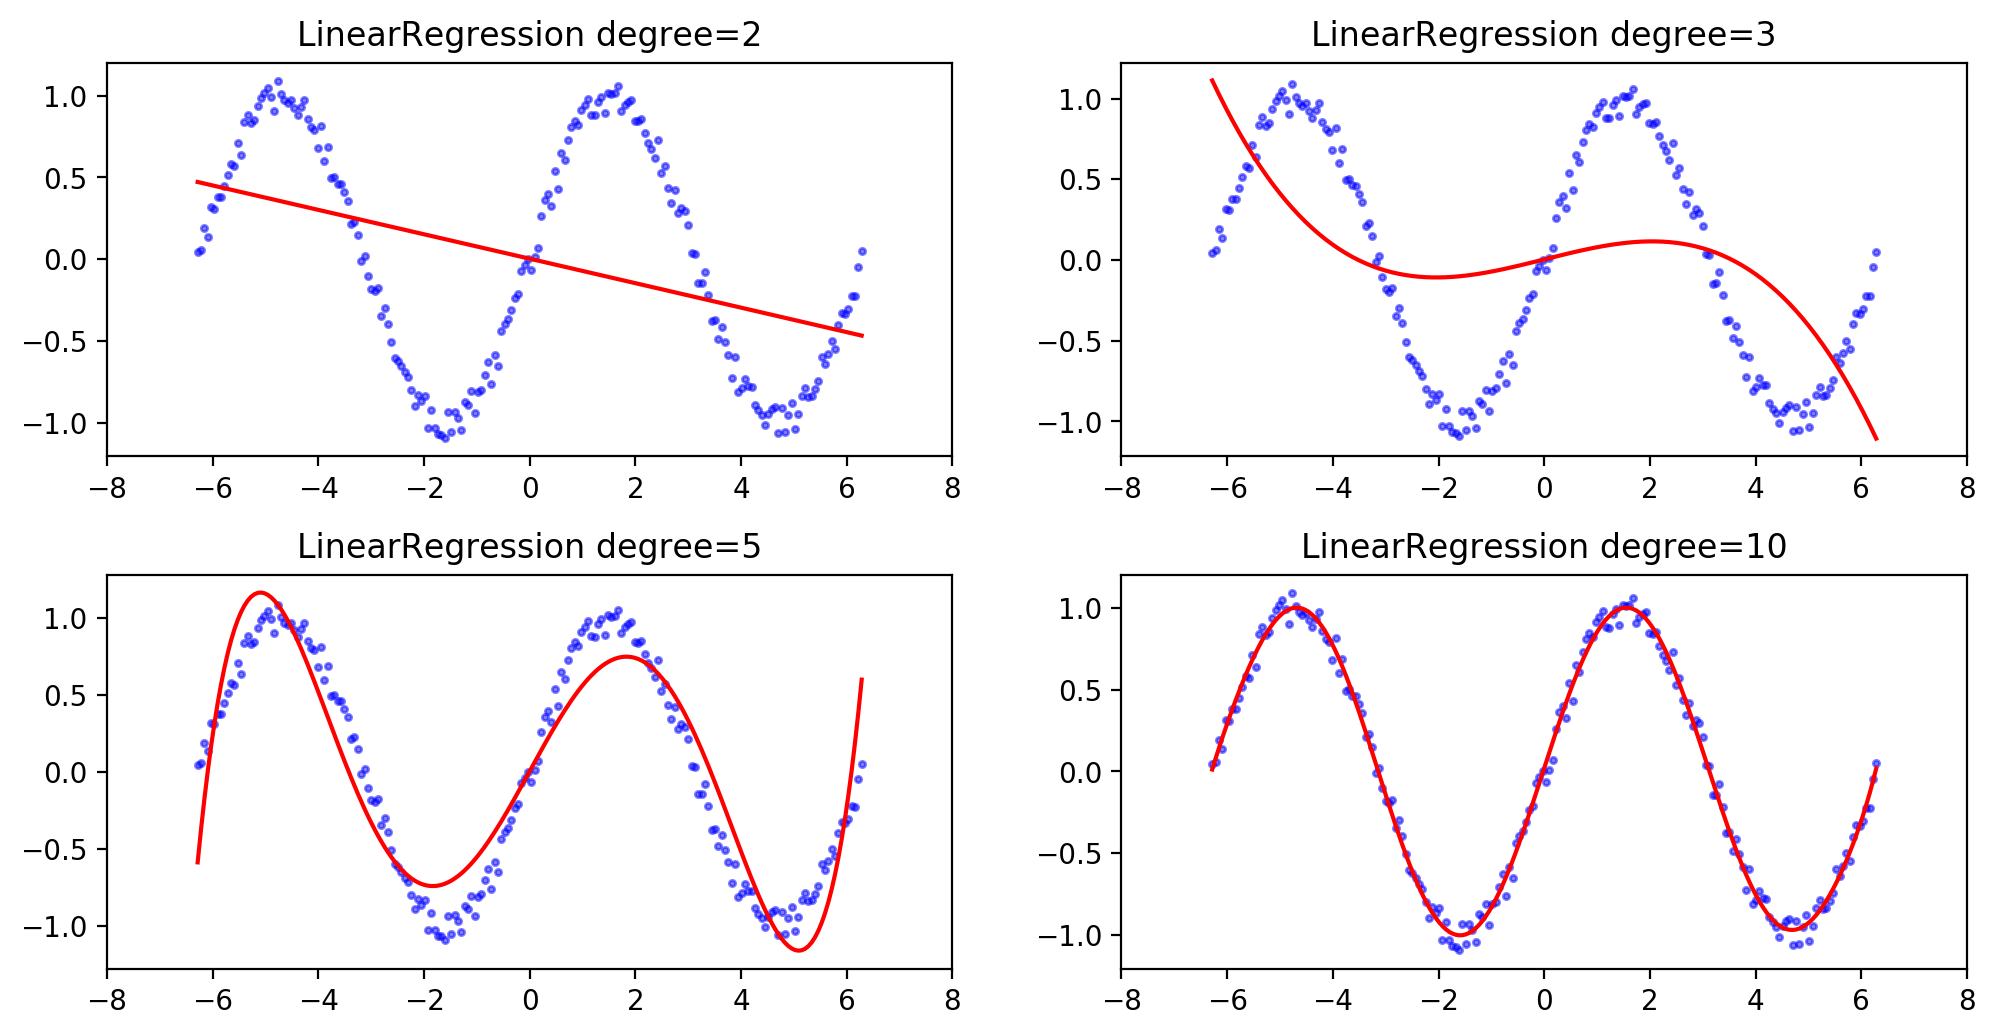

In [8]:
from matplotlib.figure import SubplotParams
# 加载多图布局调参的函数
plt.figure(figsize = (12,6), dpi = 200, 
           subplotpars = SubplotParams(hspace = 0.3))
# 设置图形属性及多图布局参数
for i,r in enumerate(results):
# 枚举results(每个元素和对应的索引生成字典),对每个元素循环
    fig = plt.subplot(2,2,i+1)
    # 子图所在位置
    plt.xlim(-8,8)
    # x轴刻度值范围
    plt.title("LinearRegression degree={}".format(r["degree"]))
    # 打印每个图的标题
    plt.scatter(X,Y,s=5,c="b",alpha=0.5)
    # 画数据点,s大小,c颜色,alpha表透明度
    plt.plot(X,r["model"].predict(X),"r-")
    # 画线,给出横坐标X,纵坐标是每个元素对应模型的预测值,"r-"表示红色实线

多图布局子图距离调整: plt.subplots_asjust() left,right,bottom,top,wspace,hspace,这里w表width,h表height

在$[-2\pi,2\pi]$范围内,10阶多项式对数据拟合很好,可以尝试查看在$[-20,20]$范围内的拟合效果

# 预测房价

In [9]:
# 加载数据
from sklearn.datasets import load_boston
boston = load_boston()
X = boston.data
# 提取数据中的自变量给X
y = boston.target
# 提取数据中的因变量给y
X.shape
# 查看X的维度

(506, 13)

In [10]:
# 数据描述
print(boston.feature_names)
# feature_names表列名,是自带数据自有的属性
pd.DataFrame(X).describe()
# 查看对数据数值列的描述
# print(boston.DESCR)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


,0,1,2,3,4,5,6,7,8,9,10,11,12
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


[波士顿房价数据](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/),总共506个观测,13个特征,是在1993年收集的.

对应预测变量名依次是: 

- CRIM:城镇人均犯罪率
- ZN:城镇超过25000平方英尺的住宅区域的占地比例
- INDUS:城镇非零售用地占用比例
- CHAS:是否靠近河边,1为靠近
- NOX:一氧化氮浓度
- RX:每套房产的平均房间数
- AGE:在1940年之前就盖好,且业主自住的房子比例
- DIS:与波士顿市中心的距离
- RAD:周边高速公路的便利性指数
- TAX:每10000美元的财产税率
- PTRATIO:小学老师的比例
- B:城镇黑人的比例
- LSTAT:地位较低的人口比例

响应变量:

- MEDV:自有房屋价值的中位数,单位:千美元

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,
                                                 random_state=1)
# 分训练集和测试集,test_size是测试集占比,random_state表示随机数种子的数值

In [12]:
import time
# 加载时间包
model = LinearRegression()
start = time.perf_counter()
# 记录当前时间
model.fit(X_train,y_train)
# 训练数据拟合线性回归模型
train_score = model.score(X_train,y_train)
test_score = model.score(X_test,y_test)
print(f"""elapse: {time.perf_counter()-start:.6f};
train_score: {train_score:.6f};
test_score: {test_score:.6f}; """)
# 查看拟合模型后的新时间和之前开始时间的时间差
# 查看训练集分数和测试集分数
print(model.coef_)
# coef_表示回归系数
print(model.intercept_)
# intercept_回归截距项

elapse: 0.007234;
train_score: 0.729359;
test_score: 0.763417; 
[-1.12386867e-01  5.80587074e-02  1.83593559e-02  2.12997760e+00
 -1.95811012e+01  3.09546166e+00  4.45265228e-03 -1.50047624e+00
  3.05358969e-01 -1.11230879e-02 -9.89007562e-01  7.32130017e-03
 -5.44644997e-01]
42.93352585337743


In [13]:
model = polynomial_model(degree = 2, normalize=False)
# 建立二阶多项式回归模型
start = time.perf_counter()
# 记录当前时间
model.fit(X_train,y_train)
# 训练数据拟合模型
train_score = model.score(X_train, y_train)
test_score = model.score(X_test,y_test)
print(f"""elapse: {time.perf_counter()-start:.6f};
train_score: {train_score:.6f};
test_score: {test_score:.6f}; """)
# 查看消耗时间,训练集和测试集的得分

elapse: 0.014365;
train_score: 0.926405;
test_score: 0.911624; 


# 使用[Statesmodels](http://www.statsmodels.org/stable/index.html)

In [14]:
import statsmodels.api as sm
X = pd.DataFrame(boston.data,columns=boston.feature_names)
# 从原始数据生成自变量对应的数据框,指定列名
y = pd.DataFrame(boston.target,columns=["MEDV"])
# 生成因变量对应的数据框,指定列名
for column in X.columns:
# 对每列的列名循环,X.columns抽取列名
    if X[column].dtype==object:
    # 通过列名抽取列,dtype表示列的类型,判断列类型是否等于object
        dummyCols = pd.get_dummies(X[column]).iloc[:,1:]
        # 类型为object的列生成哑变量
        X = X.join(dummyCols)
        # 将生成的哑变量附在X后面
        del X[column]
        # 去掉用来生成哑变量的原始列
X = sm.add_constant(X)
# add_constant()表示增加常数项
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,
                                                 random_state=1)
# 分训练集和测试集
model = sm.OLS(y_train,X_train).fit()
# 使用statesmodels包中的OLS函数,即最小二乘函数拟合训练集
model.summary()
# 查看训练结果的总结

C:\Programs\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     80.85
Date:                Wed, 24 Apr 2019   Prob (F-statistic):          5.53e-102
Time:                        00:22:37   Log-Likelihood:                -1196.4
No. Observations:                 404   AIC:                             2421.
Df Residuals:                     390   BIC:                             2477.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.9335      5.752      7.464      0.000      31.625      54.242
CRIM          -0.1124      0.034     -3.288      0.001      -0.180      -0.045
ZN             0.0581      0.016      3.596      0.000       0.026       0.090
INDUS          0.0184      0.068      0.271      0.786      -0.115       0.151
CHAS           2.1300      0.909      2.343      0.020       0.343       3.917
NOX          -19.5811      4.276     -4.579      0.000     -27.988     -11.174
RM             3.0955      0.479      6.465      0.000       2.154       4.037
AGE            0.0045      0.015      0.298      0.766      -0.025       0.034
DIS           -1.5005      0.229     -6.544      0.000      -1.951      -1.050
RAD            0.3054      0.078      3.917      0.000       0.152       0.459
TAX           -0.0111      0.004     -2.532      0.012      -0.020      -0.002
PTRATIO       -0.9890      0.149     -6.631      0.000      -1.282      -0.696
B              0.0073      0.003      2.428      0.016       0.001       0.013
LSTAT         -0.5446      0.057     -9.489      0.000      -0.657      -0.432
==============================================================================
Omnibus:                      162.425   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              785.316
Skew:                           1.688   Prob(JB):                    2.96e-171
Kurtosis:                       8.937   Cond. No.                     1.50e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
mse = model.mse_resid
# 得到模型的均方误差,这里的均方误差是残差平方和除以自由度
rse = np.sqrt(model.mse_resid)
# 对均方误差开根号得到残差标准误
poe = np.sqrt(model.mse_resid)/np.mean(y_train)
# 残差标准误除以真实y的均值得到误差百分比
print(f"""R squared: {model.rsquared:.3f}
MSE: mean squared error: {mse:.3f}
RSE: residual standard error: {rse:.3f}
Percentage of error: {float(poe):.3f}""")
# 打印之前得到的结果

R squared: 0.729
MSE: mean squared error: 22.648
RSE: residual standard error: 4.759
Percentage of error: 0.211


OLS模型结果包含的内容可以查看官网[statsmodels.regression.linear_model.OLSResults](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLSResults.html#statsmodels.regression.linear_model.OLSResults),以及[statsmodels.regression.linear_model.RegressionResults](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.RegressionResults.html#statsmodels.regression.linear_model.RegressionResults)

### 残差图:

使用模型结果对应的离群点检测函数outlier.test()找到学生化残差,与预测值生成学生化残差图

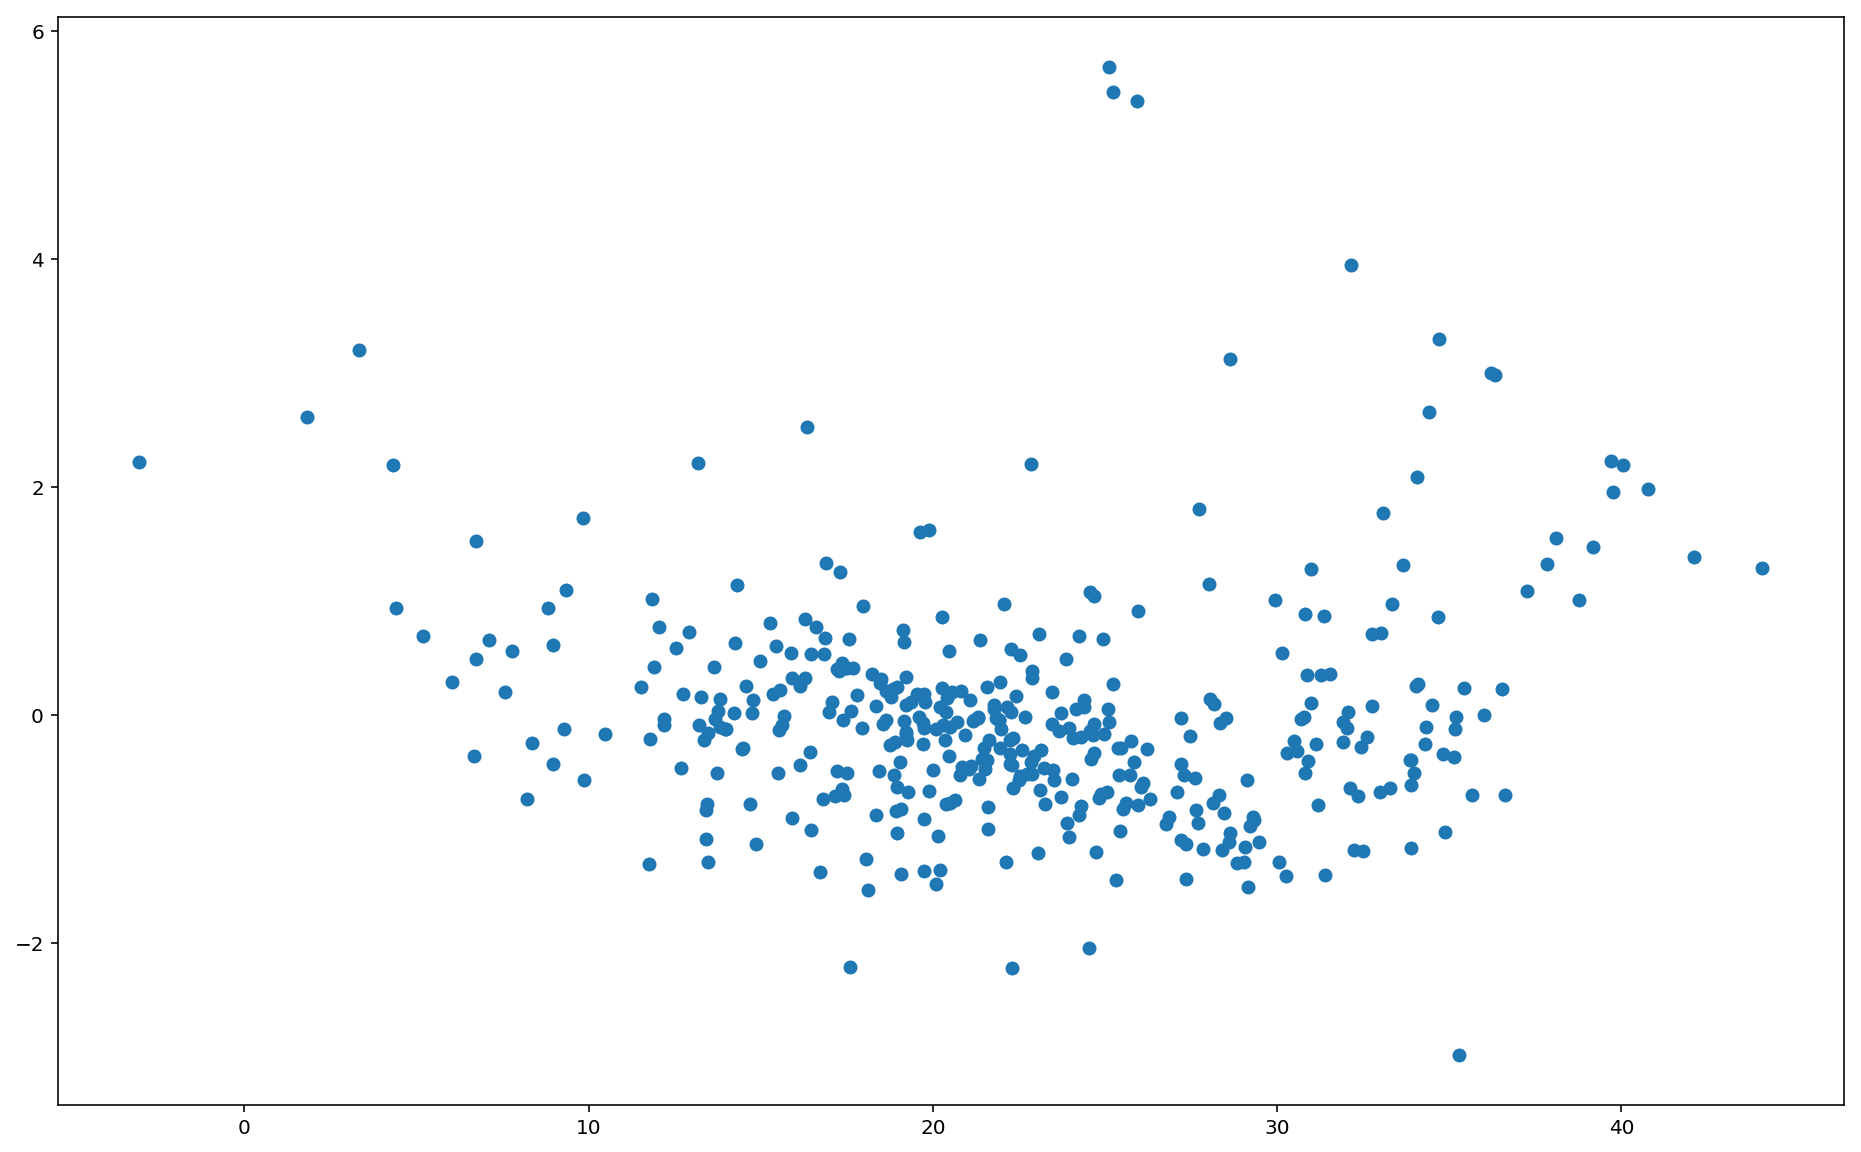

In [16]:
stu_re = model.outlier_test().student_resid
# 抽取学生化残差的数据
plt.figure(figsize=(16,10),dpi=144)
plt.scatter(model.fittedvalues,stu_re)
# model.fittedvalues表示y的预测值
# 这里预测值为X轴,学生化残差为y轴画散点图即学生化残差图

### 删除离群点

In [17]:
print(f"before delete outlier: {X_train.shape},{y_train.shape}")
# 打印目前X和y训练集的尺寸
ind = stu_re[np.absolute(stu_re)>3].index
# absolute对之前的到的学生化残差取绝对值,通过取子集的当时抽取绝对值大于3的值
# index找到筛选后的值对应的索引
print(f"rows' index to be deleted: {ind}")
y_train = y_train.loc[y_train.index.drop(ind)]
# drop:通过删除指定的索引得到新的索引
X_train = X_train.loc[X_train.index.drop(ind)]
print(f"after delete outlier: {X_train.shape},{y_train.shape}")

before delete outlier: (404, 14),(404, 1)
rows' index to be deleted: Int64Index([186, 372, 412, 368, 253, 369, 371], dtype='int64')
after delete outlier: (397, 14),(397, 1)


### 共线性

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
[variance_inflation_factor(X_train.iloc[:,1:].values,i) 
                 for i in range(X_train.shape[1]-1)]
# 抽取除第一列以外的训练数据,使用列表生成式循环每一列计算对应的vif值

[1.9910786415113044,
 3.1948609967362382,
 13.49057356281551,
 1.1624871215775858,
 72.43949969443146,
 82.05517930831232,
 21.584327718933203,
 16.01820644817747,
 15.866923375761965,
 63.348590080383474,
 87.39371792402711,
 20.5199421375946,
 12.556557078495699]

In [39]:
list(range(1,13))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [42]:
x.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [41]:
def calculate_vif(x,thresh=10):
    # 定义通过计算vif筛选列的函数,x是数据,thresh是vif对应的阈值
    output = x
    # 初始化输出数据框为输出的数据
    rm_col = []
    # 初始化删除列的列表
    k = x.shape[1]
    # 列数
    vif = [variance_inflation_factor(x.values, j) for j in range(k)]
    # 计算所有列的vif值,初始化vif
    for i in range(1,k):
        # 循环1到至多k-1次
        a = np.argmax(vif)
        # 根据最大的vif值返回索引位置
        print(f"""Iteration no. {i},
vif value: {vif},
Max VIF is for variable name.: {output.columns[a]}""")
        # 打印循环的次数,vif的值,最大vif对应的列名
        if vif[a] <= thresh :
            # 如果最大的vif值小于阈值,跳出循环
            break
        rm_col.append(output.columns[a])
        # 删除列的列表中,填加最大vif对应的列名
        output = output.drop(output.columns[a], axis = 1)
        # drop依据索引删除多行或多列,axis=1表示列,这里删除最大vif对应的列
        vif = [variance_inflation_factor(output.values, j) 
                    for j in range(output.shape[1])]
        # 计算删除后数据新的vif值
    output = sm.add_constant(output)
    # 循环结束后为输出数据添加常数列
    return((output,rm_col))
X_train_new,rm_col= calculate_vif(X_train.iloc[:,1:],thresh=5)
# 对训练数据依据vif筛选列,阈值为5

Iteration no. 1,
vif value: [1.9910786415113044, 3.1948609967362382, 13.49057356281551, 1.1624871215775858, 72.43949969443146, 82.05517930831232, 21.584327718933203, 16.01820644817747, 15.866923375761965, 63.348590080383474, 87.39371792402711, 20.5199421375946, 12.556557078495699],
Max VIF is for variable name.: PTRATIO
Iteration no. 2,
vif value: [1.98981064398261, 2.6505085602783525, 13.3015635453642, 1.1504121449400686, 72.43912771835427, 64.91281422946845, 21.567865339973952, 12.881992385014197, 15.86586817506193, 60.980049190237416, 19.094573721477158, 11.478291201069482],
Max VIF is for variable name.: NOX
Iteration no. 3,
vif value: [1.9851287653207508, 2.648739358733148, 12.196306402919168, 1.1411422214774811, 45.18706296524524, 20.357412847811492, 12.657943523141917, 15.856252702372691, 59.17101134049851, 18.94791541364439, 10.492954052820874],
Max VIF is for variable name.: TAX
Iteration no. 4,
vif value: [1.9849213227912268, 2.5506284722480532, 8.861887837967066, 1.117880432

In [44]:
print(f"columns to be deleted: {rm_col}")
# 打印所有删除的列
model = sm.OLS(y_train,X_train_new).fit()
# 训练新数据
model.summary()
# 模型总结

columns to be deleted: ['PTRATIO', 'NOX', 'TAX', 'RM', 'AGE', 'B', 'LSTAT']


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     55.74
Date:                Wed, 24 Apr 2019   Prob (F-statistic):           1.51e-49
Time:                        01:02:04   Log-Likelihood:                -1287.8
No. Observations:                 397   AIC:                             2590.
Df Residuals:                     390   BIC:                             2618.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5320      1.472     23.464      0.000      31.639      37.425
CRIM          -0.2119      0.044     -4.840      0.000      -0.298      -0.126
ZN             0.1314      0.019      6.982      0.000       0.094       0.168
INDUS         -0.5738      0.071     -8.119      0.000      -0.713      -0.435
CHAS           3.2253      1.201      2.685      0.008       0.864       5.587
DIS           -1.5322      0.250     -6.126      0.000      -2.024      -1.040
RAD           -0.1269      0.053     -2.407      0.017      -0.230      -0.023
==============================================================================
Omnibus:                      124.540   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              385.866
Skew:                           1.440   Prob(JB):                     1.62e-84
Kurtosis:                       6.877   Cond. No.                         128.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 查看学生化残差图

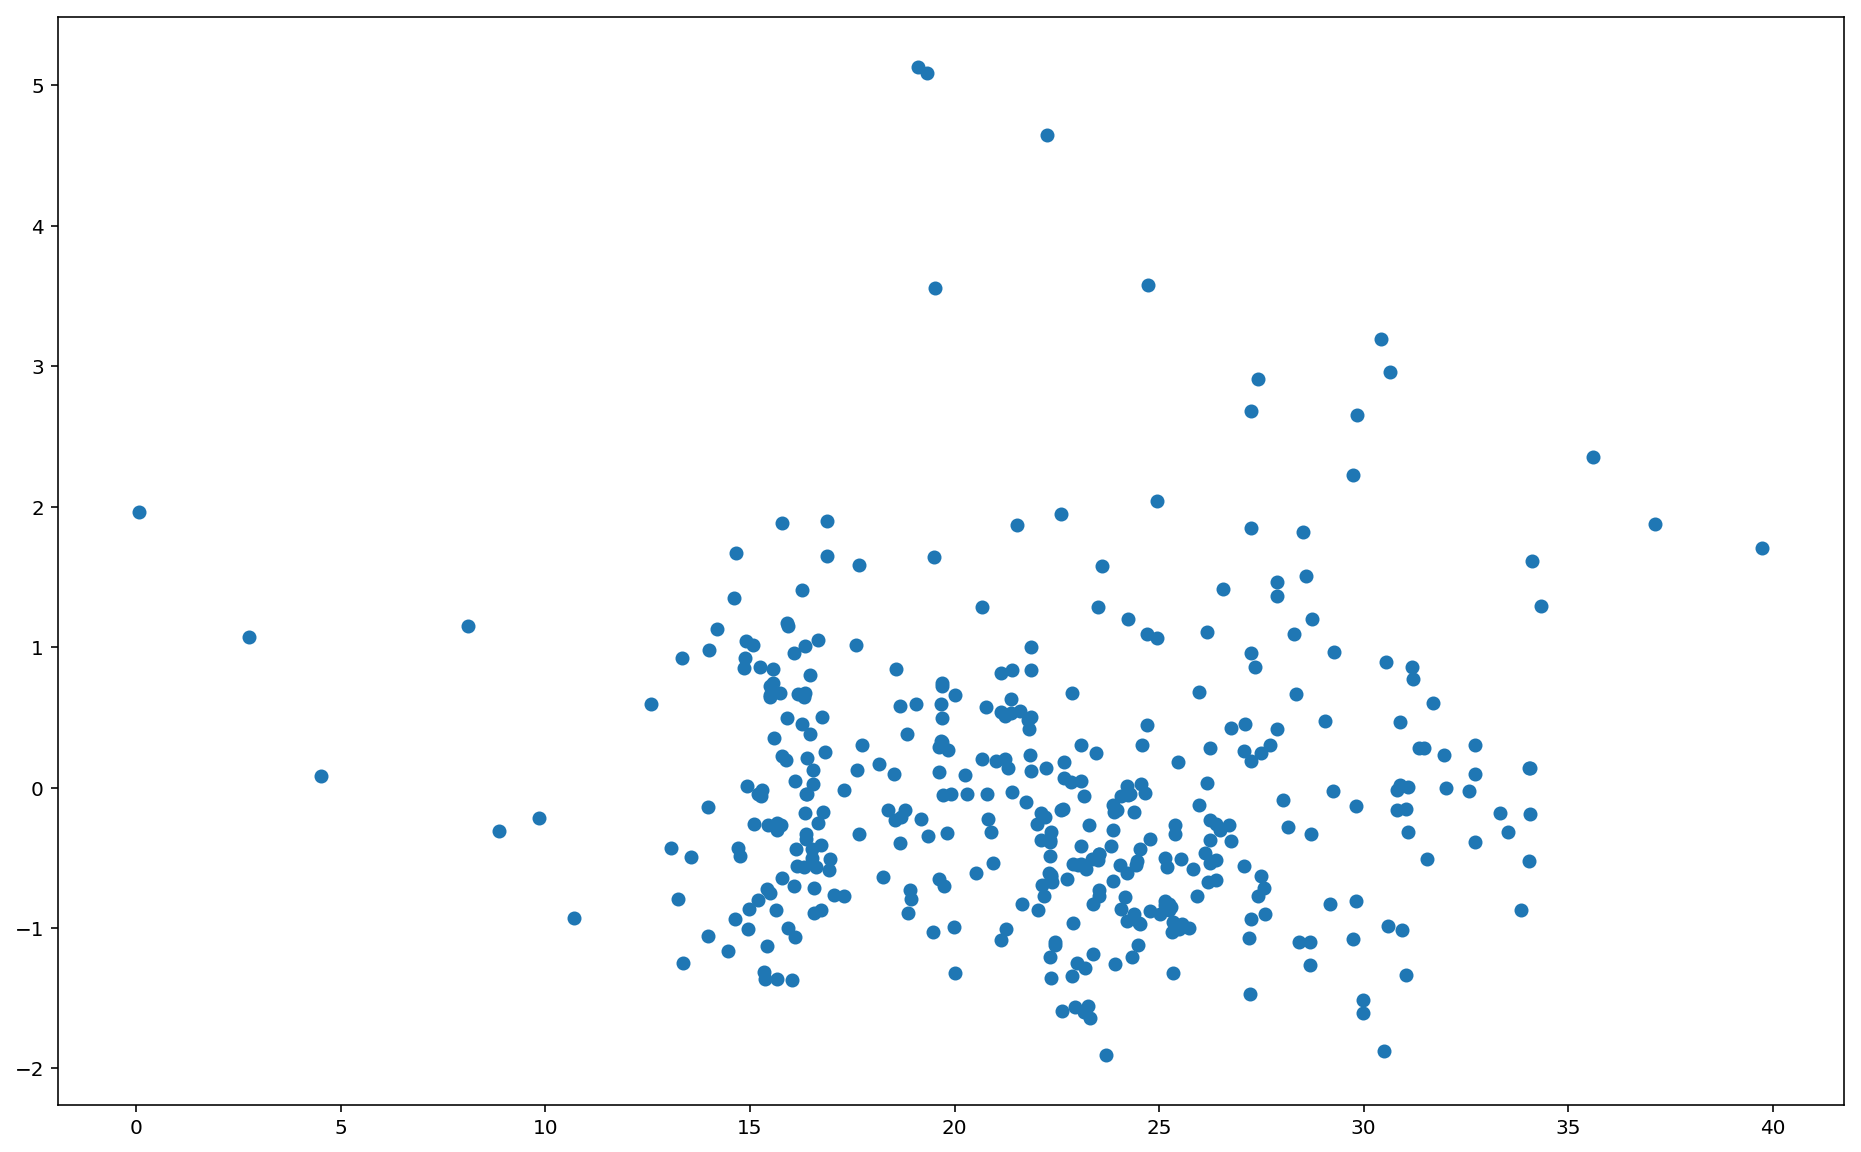

In [45]:
stu_re = model.outlier_test().student_resid
plt.figure(figsize=(16,10),dpi=144)
plt.scatter(model.fittedvalues,stu_re)

### 检验残差正态性

$H_0$: 残差服从正态分布

In [46]:
from scipy import stats
stats.shapiro(model.resid)

(0.9132505059242249, 2.5053555760480746e-14)

表示残差不服从正态分布,表示需要对y处理,或存在异常值的影响

### 检验残差的自相关性

$H_0$: 没有自相关

In [47]:
from statsmodels.stats import diagnostic as diag
diag.acorr_ljungbox(model.resid,lags =1)

(array([0.78905168]), array([0.37438703]))

表明残差之间没有自相关性,没有未发觉的隐藏的预测变量

### 检验异方差

$H_0$: 残差是同方差的

In [48]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ["F statistic","p-value"]
test = sms.het_goldfeldquandt(model.resid,model.model.exog)
lzip(name,test)

[('F statistic', 0.9071499223350348), ('p-value', 0.7495541675538814)]

表示残差是同方差的

代码参考资料: [LINEAR REGRESSION IN PYTHON](https://www.listendata.com/2018/01/linear-regression-in-python.html)